## Logistic Regression Example using 'sklearn'
- Will use `make_classification` for generating dataset.
- Will use only `one feature` and `m` training sets.

<img src="images/model_lr.png" style="width:500px;text-align:center">


In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### Generate Dataset

In [2]:
# Generate dataset for Logistic Regression
data_set_x_orig, data_set_y_orig = make_classification(n_samples=100,n_features=1, n_informative=1, n_redundant=0,n_classes=2,
    n_clusters_per_class=1,)

In [3]:
print(data_set_x_orig.shape)
print(data_set_x_orig[:,0])

(100, 1)
[ 0.35632263  0.93389244 -1.03737108  1.0078126   0.70242731  0.49498099
 -2.40878085 -0.78705555  0.58787949  0.01071946  0.68991885  0.63700986
  1.25743649  0.84953401  1.43013283  1.27627189 -0.17062477  1.63398241
  0.5188776  -0.9161894  -0.70666029 -0.23853159  0.21860495 -0.76307829
  0.56002633 -1.11534586 -0.70280587 -0.13310346 -1.05573024  0.53846255
  1.05599125  0.93134775 -0.38955517 -0.46981204 -1.27431038 -0.23432791
 -1.004734    1.3417221  -0.4179054  -0.93302551  0.81939797  1.13757775
  1.69247312 -0.85121154  1.43015932  0.83863948 -0.57186284 -1.58457561
  0.89040394 -0.69179752 -0.87600893  0.92673765 -1.10205787  1.48467131
 -0.90792734 -0.41040457  0.78798443  0.81875579  1.20229558 -1.19540406
 -0.45370414  0.91450454  1.66989295 -1.23061868 -0.69979629  1.07401934
  1.13324489  1.13924503 -0.67319542 -0.83993347 -0.83564304  0.94278384
 -1.5312533   0.45210491 -0.86797134  0.9630513   1.2216161  -1.51566279
 -1.95485539  0.94236048  0.08714748  0.97

### Visualization

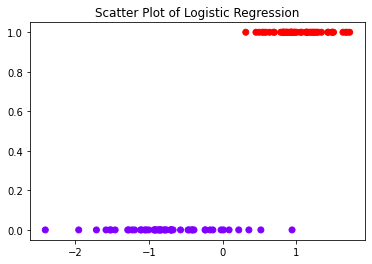

In [4]:
plt.scatter(data_set_x_orig[:,0], data_set_y_orig, c=data_set_y_orig, cmap='rainbow')
plt.title('Scatter Plot of Logistic Regression')
plt.show()

In [5]:
# Split the dataset into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(data_set_x_orig, data_set_y_orig, train_size=0.8, test_size=0.2, random_state=1)

In [6]:
# Create a Logistic Regression Object, perform Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [7]:
# Show to Coeficient and Intercept
print(lr.coef_)
print(lr.intercept_)

[[3.06083546]]
[-0.79333348]


In [8]:
# Perform prediction using the test dataset
y_pred = lr.predict(x_test)
print(y_pred)

[0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1]


In [9]:
# Show the Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[10,  0],
       [ 0, 10]])

**Mathematical expression of the algorithm**:

For $i^{(th)}$ example $x^{(i)}$:  

$z^{(i)} = w^T x^{(i)} + b$  

$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})$  

$\mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})$  

The cost is then computed by summing over all training examples:  

$J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})$

**Key steps**:
In this exercise, you will carry out the following steps: 
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.